# **Loading Dependencies**

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)

from sklearn.linear_model import LinearRegression,Lasso,Ridge,LassoCV,RidgeCV
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures,StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBRegressor
import joblib
from scipy.stats import ttest_ind

## **Loading the datasets into pandas dataframe**

In [2]:
financial = pd.read_csv('Household_Financial_Stability_Uganda-1a.csv')
seasonal = pd.read_csv('Household_Seasonal_Data_Uganda-1b.csv')

In [3]:
financial.head()

,Household_ID,Location,Family_Size,Education_Level,Employment_Type,Has_Savings_Account,Uses_Savings_Group,Uses_Mobile_Money,Distance_to_Bank_km,Borrowing,Selling_Assets,Reducing_Spending,Financial_Stress_Score
0,1,Mbale,2,Secondary,Subsistence Farming,1,0,0,43.87,0,0,0,38.17
1,2,Mbarara,8,Secondary,Livestock Rearing,0,1,0,19.10,0,0,1,40.89
2,3,Jinja,9,NaN,Subsistence Farming,0,0,0,33.68,0,1,0,30.64
3,4,Fort Portal,5,Secondary,Livestock Rearing,1,1,1,22.11,0,0,0,41.67
4,5,Mbale,4,Tertiary,Subsistence Farming,1,0,0,39.52,0,0,1,52.50


In [4]:
seasonal.head()

,Household_ID,Month,Year_month,Crop_Income,Livestock_Income,Off_Farm_Income,Food_Expenses,Healthcare_Expenses,Education_Expenses,Discretionary_Expenses,Total_Income,Total_Expense,Income_After_Expense,Wealth_Status
0,1,1,Jan-23,41479,10218,22426,33593,6718,10077,16796,74123,67184,6939,Low Income
1,1,2,Feb-23,71975,39159,64340,67307,13461,20192,33653,175474,134613,40861,Middle Income
2,1,3,Mar-23,51500,10150,38033,31871,6374,9561,15935,99683,63741,35942,Middle Income
3,1,4,Apr-23,54994,26173,33915,57518,11503,17255,28759,115082,115035,47,Low Income
4,1,5,May-23,15425,23218,22095,30281,6056,9084,15140,60738,60561,177,Low Income


In [5]:
# Getting some information about the datasets
print('Information of Financial dataset: ', financial.info(), '\n')
print('Information of Seasonal dataset: ',seasonal.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Household_ID            1000 non-null   int64  
 1   Location                1000 non-null   object 
 2   Family_Size             1000 non-null   int64  
 3   Education_Level         904 non-null    object 
 4   Employment_Type         1000 non-null   object 
 5   Has_Savings_Account     1000 non-null   int64  
 6   Uses_Savings_Group      1000 non-null   int64  
 7   Uses_Mobile_Money       1000 non-null   int64  
 8   Distance_to_Bank_km     1000 non-null   float64
 9   Borrowing               1000 non-null   int64  
 10  Selling_Assets          1000 non-null   int64  
 11  Reducing_Spending       1000 non-null   int64  
 12  Financial_Stress_Score  1000 non-null   float64
dtypes: float64(2), int64(8), object(3)
memory usage: 101.7+ KB
Information of Financial dataset:  

In [6]:
# Number of rows and columns in datasets
print(financial.shape, seasonal.shape)

(1000, 13) (24000, 14)


In [7]:
# checking for missing values

print('Missing values in financial dataset: ', financial.isnull().sum(), '\n')
print('Missing values in seasonal dataset: ', seasonal.isnull().sum())

Missing values in financial dataset:  Household_ID               0
Location                   0
Family_Size                0
Education_Level           96
Employment_Type            0
Has_Savings_Account        0
Uses_Savings_Group         0
Uses_Mobile_Money          0
Distance_to_Bank_km        0
Borrowing                  0
Selling_Assets             0
Reducing_Spending          0
Financial_Stress_Score     0
dtype: int64 

Missing values in seasonal dataset:  Household_ID              0
Month                     0
Year_month                0
Crop_Income               0
Livestock_Income          0
Off_Farm_Income           0
Food_Expenses             0
Healthcare_Expenses       0
Education_Expenses        0
Discretionary_Expenses    0
Total_Income              0
Total_Expense             0
Income_After_Expense      0
Wealth_Status             0
dtype: int64


#### **the missing values showing in the Education_Level are not actual missing values but people with no education that was recorded as 'None' in the dataset.**

In [8]:
# Handle missing values. 
financial['Education_Level'].fillna('No Education', inplace=True)

In [9]:
# Confirm that missing values are handled
print('Missing values in financial dataset: ', financial.isnull().sum().sum())

Missing values in financial dataset:  0


In [10]:
# Checking for duplicates

print('Duplicated values in financial dataset: ', financial.duplicated().sum(), '\n')
print('Duplicated values in seasonal dataset: ', seasonal.duplicated().sum())

Duplicated values in financial dataset:  0 

Duplicated values in seasonal dataset:  0


In [11]:
# Ensuring there are no accidental spaces in the column names
financial.columns = financial.columns.str.strip()
seasonal.columns = seasonal.columns.str.strip()

In [12]:
financial.columns

Index(['Household_ID', 'Location', 'Family_Size', 'Education_Level',
       'Employment_Type', 'Has_Savings_Account', 'Uses_Savings_Group',
       'Uses_Mobile_Money', 'Distance_to_Bank_km', 'Borrowing',
       'Selling_Assets', 'Reducing_Spending', 'Financial_Stress_Score'],
      dtype='object')

In [13]:
# Statistical distribution of datasets

print('Statistical Distribution of Financial dataset: \n', financial.describe().transpose(), '\n\n')
print('Statistical Distribution of Seasonal dataset: \n', seasonal.describe().transpose())

Statistical Distribution of Financial dataset: 
                          count       mean         std    min      25%     50%  \
Household_ID            1000.0  500.50000  288.819436   1.00  250.750  500.50   
Family_Size             1000.0    5.42500    2.311648   2.00    3.000    5.00   
Has_Savings_Account     1000.0    0.60100    0.489938   0.00    0.000    1.00   
Uses_Savings_Group      1000.0    0.52100    0.499809   0.00    0.000    1.00   
Uses_Mobile_Money       1000.0    0.28600    0.452115   0.00    0.000    0.00   
Distance_to_Bank_km     1000.0   25.60756   14.342114   1.02   12.950   25.87   
Borrowing               1000.0    0.28300    0.450682   0.00    0.000    0.00   
Selling_Assets          1000.0    0.19900    0.399448   0.00    0.000    0.00   
Reducing_Spending       1000.0    0.48500    0.500025   0.00    0.000    0.00   
Financial_Stress_Score  1000.0   39.82726    7.179018  14.96   35.565   40.82   

                            75%      max  
Household_ID    

In [14]:
# Checking for data entry errors
print('unique Locations: ', financial['Location'].unique(), '\n')
print('unique Education Levels: ', financial['Education_Level'].unique(), '\n')
print('unique Employment Types: ', financial['Employment_Type'].unique())

unique Locations:  ['Mbale' 'Mbarara' 'Jinja' 'Fort Portal' 'Hoima' 'Lira' 'Arua' 'Gulu'
 'Kampala' 'Masaka'] 

unique Education Levels:  ['Secondary' 'No Education' 'Tertiary' 'Primary'] 

unique Employment Types:  ['Subsistence Farming' 'Livestock Rearing' 'Small Business' 'Casual Labor']


In [15]:
# Merge the two datasets using a left join
joined_data = pd.merge(seasonal,financial, on='Household_ID',how='left')
print(joined_data.shape)
joined_data.head()

(24000, 26)


,Household_ID,Month,Year_month,Crop_Income,Livestock_Income,Off_Farm_Income,Food_Expenses,Healthcare_Expenses,Education_Expenses,Discretionary_Expenses,...,Education_Level,Employment_Type,Has_Savings_Account,Uses_Savings_Group,Uses_Mobile_Money,Distance_to_Bank_km,Borrowing,Selling_Assets,Reducing_Spending,Financial_Stress_Score
0,1,1,Jan-23,41479,10218,22426,33593,6718,10077,16796,...,Secondary,Subsistence Farming,1,0,0,43.87,0,0,0,38.17
1,1,2,Feb-23,71975,39159,64340,67307,13461,20192,33653,...,Secondary,Subsistence Farming,1,0,0,43.87,0,0,0,38.17
2,1,3,Mar-23,51500,10150,38033,31871,6374,9561,15935,...,Secondary,Subsistence Farming,1,0,0,43.87,0,0,0,38.17
3,1,4,Apr-23,54994,26173,33915,57518,11503,17255,28759,...,Secondary,Subsistence Farming,1,0,0,43.87,0,0,0,38.17
4,1,5,May-23,15425,23218,22095,30281,6056,9084,15140,...,Secondary,Subsistence Farming,1,0,0,43.87,0,0,0,38.17


In [16]:
# Export the merged dataset
joined_data.to_csv('Ugandan Merged Data.csv', index=False)

Number of Outliers Detected:  12
outliers below 21.3375 : 12
outliers above 59.277499999999996 : 0


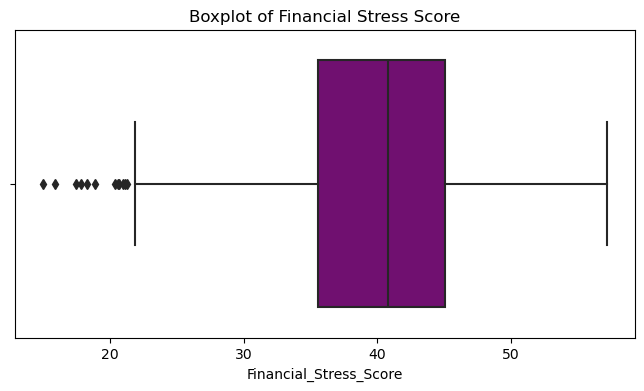

In [17]:
# Checking for outliers in our target variable
Q1 = financial['Financial_Stress_Score'].quantile(0.25)
Q3 = financial['Financial_Stress_Score'].quantile(0.75)

IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier = financial[(financial['Financial_Stress_Score'] < lower_bound) | (financial['Financial_Stress_Score'] > upper_bound)]

if outlier.empty:
    print('No Outliers Detected')
else:
    print('Number of Outliers Detected: ', outlier.shape[0])

print('outliers below',lower_bound,':',financial[financial['Financial_Stress_Score'] < lower_bound].shape[0])
print('outliers above',upper_bound,':',financial[financial['Financial_Stress_Score'] > upper_bound].shape[0])

# Visualize the outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=financial['Financial_Stress_Score'], color='purple')
plt.title('Boxplot of Financial Stress Score')
plt.show()

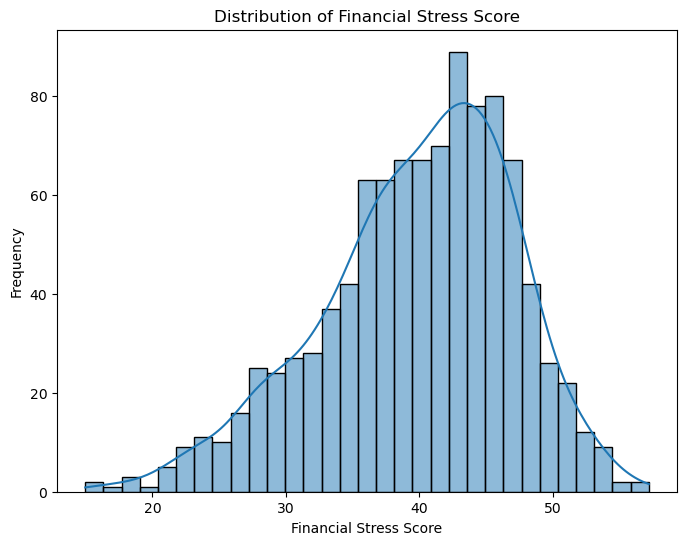

In [18]:
# Visualize the distribtion of out target variable

# Define bin size using square root rule. this takes the square root of the length of the dataframe
bin = int(np.sqrt(len(financial)))

plt.figure(figsize=(8,6))
sns.histplot(financial['Financial_Stress_Score'], bins=bin, kde=True)
plt.title('Distribution of Financial Stress Score')
plt.xlabel('Financial Stress Score')
plt.ylabel('Frequency')
plt.show()

The distribution appears roughly normal but slightly right-skewed (longer tail on the right).
Most people have a moderate financial stress score (around 40).
Fewer individuals have extremely low or extremely high stress scores.
The right skew suggests that while most people have moderate stress, a smaller number experience very high financial stress.

## **Exploratory Data Analysis**

                 count       sum       mean
Education_Level                            
No Education        96   3834.79  39.945729
Primary            513  20395.19  39.756706
Secondary          306  12053.92  39.391895
Tertiary            85   3543.36  41.686588


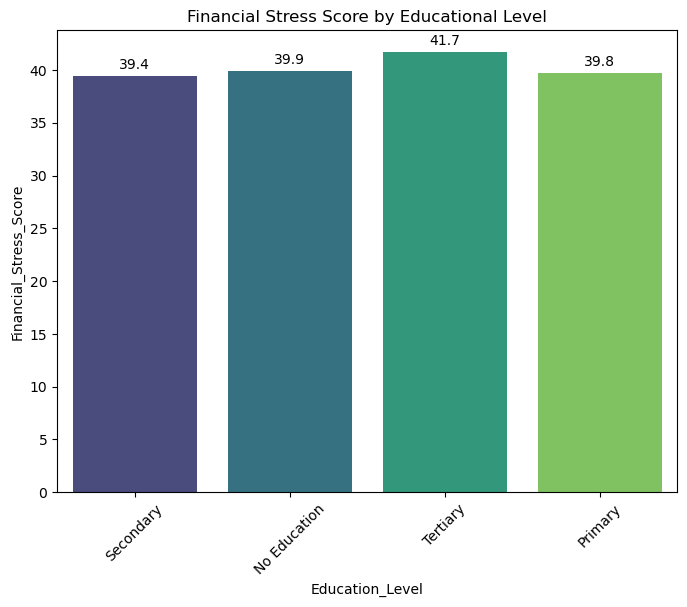

In [19]:
# Group financial stress core by Educational level

Finance_and_Education = financial.groupby('Education_Level')['Financial_Stress_Score'].agg(['count','sum','mean'])
print(Finance_and_Education)

# Visualize
plt.figure(figsize=(8,6))
ax = sns.barplot(x='Education_Level', y='Financial_Stress_Score', data=financial, ci=None, palette= 'viridis')

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", label_type="edge", padding=3)
    
plt.title('Financial Stress Score by Educational Level')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Make a copy of the dataset
df = pd.read_csv('Ugandan Merged Data.csv')
df

,Household_ID,Month,Year_month,Crop_Income,Livestock_Income,Off_Farm_Income,Food_Expenses,Healthcare_Expenses,Education_Expenses,Discretionary_Expenses,...,Education_Level,Employment_Type,Has_Savings_Account,Uses_Savings_Group,Uses_Mobile_Money,Distance_to_Bank_km,Borrowing,Selling_Assets,Reducing_Spending,Financial_Stress_Score
0,1,1,Jan-23,41479,10218,22426,33593,6718,10077,16796,...,Secondary,Subsistence Farming,1,0,0,43.87,0,0,0,38.17
1,1,2,Feb-23,71975,39159,64340,67307,13461,20192,33653,...,Secondary,Subsistence Farming,1,0,0,43.87,0,0,0,38.17
2,1,3,Mar-23,51500,10150,38033,31871,6374,9561,15935,...,Secondary,Subsistence Farming,1,0,0,43.87,0,0,0,38.17
3,1,4,Apr-23,54994,26173,33915,57518,11503,17255,28759,...,Secondary,Subsistence Farming,1,0,0,43.87,0,0,0,38.17
4,1,5,May-23,15425,23218,22095,30281,6056,9084,15140,...,Secondary,Subsistence Farming,1,0,0,43.87,0,0,0,38.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,1000,20,Aug-24,59281,36838,42606,79556,15911,23866,39778,...,Primary,Casual Labor,1,1,0,24.82,0,0,1,44.86
23996,1000,21,Sep-24,68174,39009,22251,47138,9427,14141,23569,...,Primary,Casual Labor,1,1,0,24.82,0,0,1,44.86
23997,1000,22,Oct-24,114592,19940,23729,57099,11419,17129,28549,...,Primary,Casual Labor,1,1,0,24.82,0,0,1,44.86
23998,1000,23,Nov-24,42176,14022,18619,35880,7176,10764,17940,...,Primary,Casual Labor,1,1,0,24.82,0,0,1,44.86


### *Feature Enginnering*

In [21]:
#  Extract month name and year from 'Year_month' 
df['Month_Name'] = df['Year_month'].str.split('-').str[0]  
df['Year'] = df['Year_month'].str.split('-').str[1]        

# Define harvest months (June-August and December-February)
harvest_months = ['Jun', 'Jul', 'Aug', 'Dec', 'Jan', 'Feb']

# Create the 'Season' column
df['Season'] = df['Month_Name'].apply(
    lambda month: "Harvest" if month in harvest_months else "Non_Harvest"
)

# Verify counts
print(df['Season'].value_counts())

Season
Harvest        12000
Non_Harvest    12000
Name: count, dtype: int64


In [22]:
# View dataset
df

,Household_ID,Month,Year_month,Crop_Income,Livestock_Income,Off_Farm_Income,Food_Expenses,Healthcare_Expenses,Education_Expenses,Discretionary_Expenses,...,Uses_Savings_Group,Uses_Mobile_Money,Distance_to_Bank_km,Borrowing,Selling_Assets,Reducing_Spending,Financial_Stress_Score,Month_Name,Year,Season
0,1,1,Jan-23,41479,10218,22426,33593,6718,10077,16796,...,0,0,43.87,0,0,0,38.17,Jan,23,Harvest
1,1,2,Feb-23,71975,39159,64340,67307,13461,20192,33653,...,0,0,43.87,0,0,0,38.17,Feb,23,Harvest
2,1,3,Mar-23,51500,10150,38033,31871,6374,9561,15935,...,0,0,43.87,0,0,0,38.17,Mar,23,Non_Harvest
3,1,4,Apr-23,54994,26173,33915,57518,11503,17255,28759,...,0,0,43.87,0,0,0,38.17,Apr,23,Non_Harvest
4,1,5,May-23,15425,23218,22095,30281,6056,9084,15140,...,0,0,43.87,0,0,0,38.17,May,23,Non_Harvest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,1000,20,Aug-24,59281,36838,42606,79556,15911,23866,39778,...,1,0,24.82,0,0,1,44.86,Aug,24,Harvest
23996,1000,21,Sep-24,68174,39009,22251,47138,9427,14141,23569,...,1,0,24.82,0,0,1,44.86,Sep,24,Non_Harvest
23997,1000,22,Oct-24,114592,19940,23729,57099,11419,17129,28549,...,1,0,24.82,0,0,1,44.86,Oct,24,Non_Harvest
23998,1000,23,Nov-24,42176,14022,18619,35880,7176,10764,17940,...,1,0,24.82,0,0,1,44.86,Nov,24,Non_Harvest


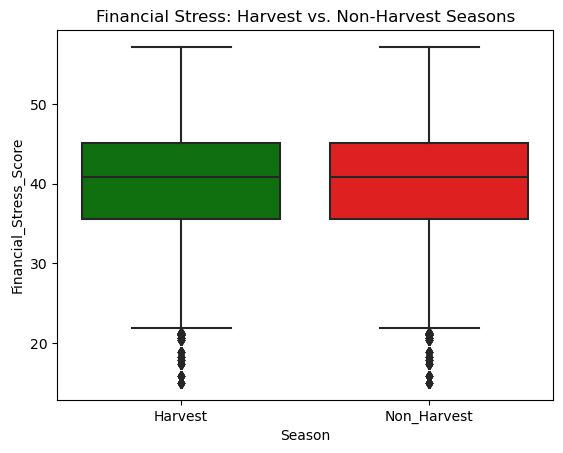

p-value: nan
❌ No significant difference found.


In [25]:
# Plot Financial stress by season
sns.boxplot(
    x='Season', 
    y='Financial_Stress_Score', 
    data=df,
    palette={"Harvest": "green", "Non_Harvest": "red"}
)
plt.title("Financial Stress: Harvest vs. Non-Harvest Seasons")
plt.show()

# Split stress scores into two groups
harvest_stress = df[df['Season'] == "Harvest_Season"]['Financial_Stress_Score']
non_harvest_stress = df[df['Season'] == "Non_Harvest_Season"]['Financial_Stress_Score']

# Run a t-test
t_stat, p_value = ttest_ind(harvest_stress, non_harvest_stress)
print(f"p-value: {p_value:.4f}")

# Interpret
if p_value < 0.05:
    print("✅ Significant difference between seasons!")
else:
    print("❌ No significant difference found.")

The median stress scoresfor Harvest and Non-Harvest seasons are very close ( there is no clear gap).

Tng boxes/whiskers suggest no strong seasonal impact on financial stress

<Axes: xlabel='Season', ylabel='Financial_Stress_Score'>

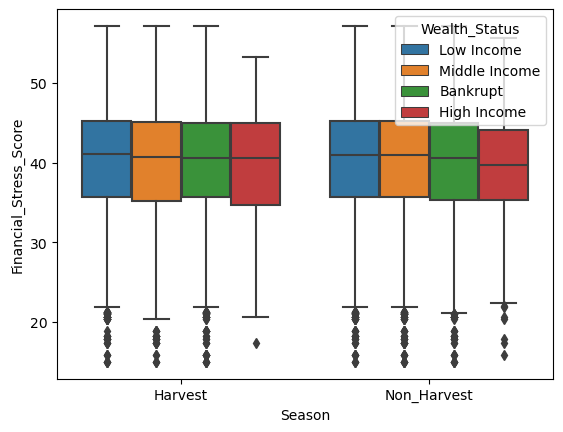

In [67]:
# Check if wealth stautus has any influence on financial stress during harvest or non-harvest seasons
sns.boxplot(x='Season', y='Financial_Stress_Score', hue='Wealth_Status', data=df)

High Income and Middle Income earners have slightly lower stress scores during the harvest season than the Low Income and Bankrupt households

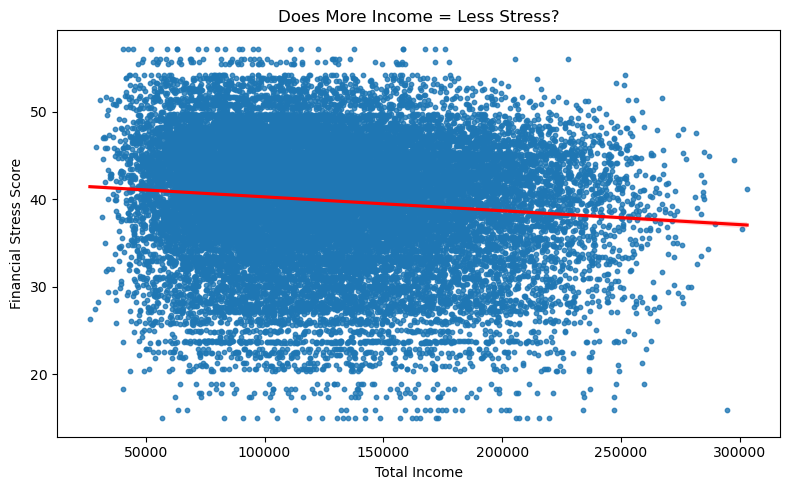

In [68]:
# Relationship between Income and financial stress
plt.figure(figsize=(8, 5))
sns.regplot(x='Total_Income', y='Financial_Stress_Score', data=df, scatter_kws={'s': 10}, line_kws={"color": "red" }) #scatter_kws={'s': 10}: makes the scatter points smaller for better visibility
plt.title("Does More Income = Less Stress?")                                                                         #line_kws={"color": "red"}: makes the regression line red for clarity.
plt.xlabel("Total Income")
plt.ylabel("Financial Stress Score")
plt.tight_layout()
plt.show()

The scatter plot shows a slight negative relationship between Total Income and Financial Stress Score, suggesting that individuals with higher incomes tend to experience slightly less financial stress. However, the wide dispersion of data points across all income levels indicates that income alone does not strongly predict financial stress. This implies that other factors beyond income, may also significantly influence an individual's level of financial stress.

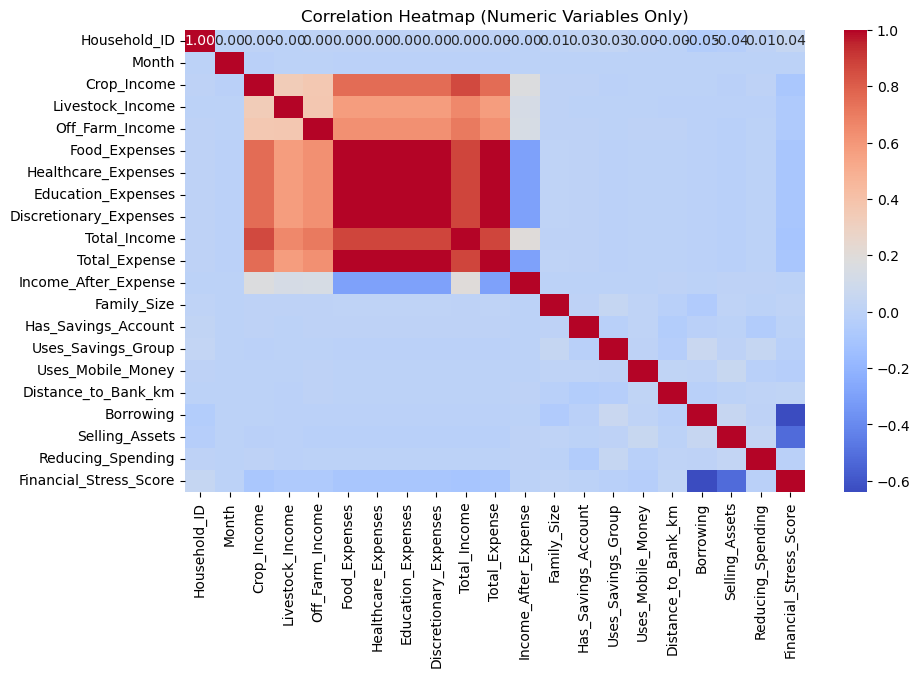

In [69]:
# Correlation heatmap
# Select only numeric columns for the correlation heatmap
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Variables Only)")
plt.show()

- Income and expenses are strongly correlated
- we will need to drop redundant aggregates like Total_Income and Total_Expense since we will be using the other columns from which they were derived and they don’t add new information.
- Financial stress is negatively correlated with Borrowing and Spending,we need to confim this unusual correlation

### *Confirming the unsual correlation in the heatmap*

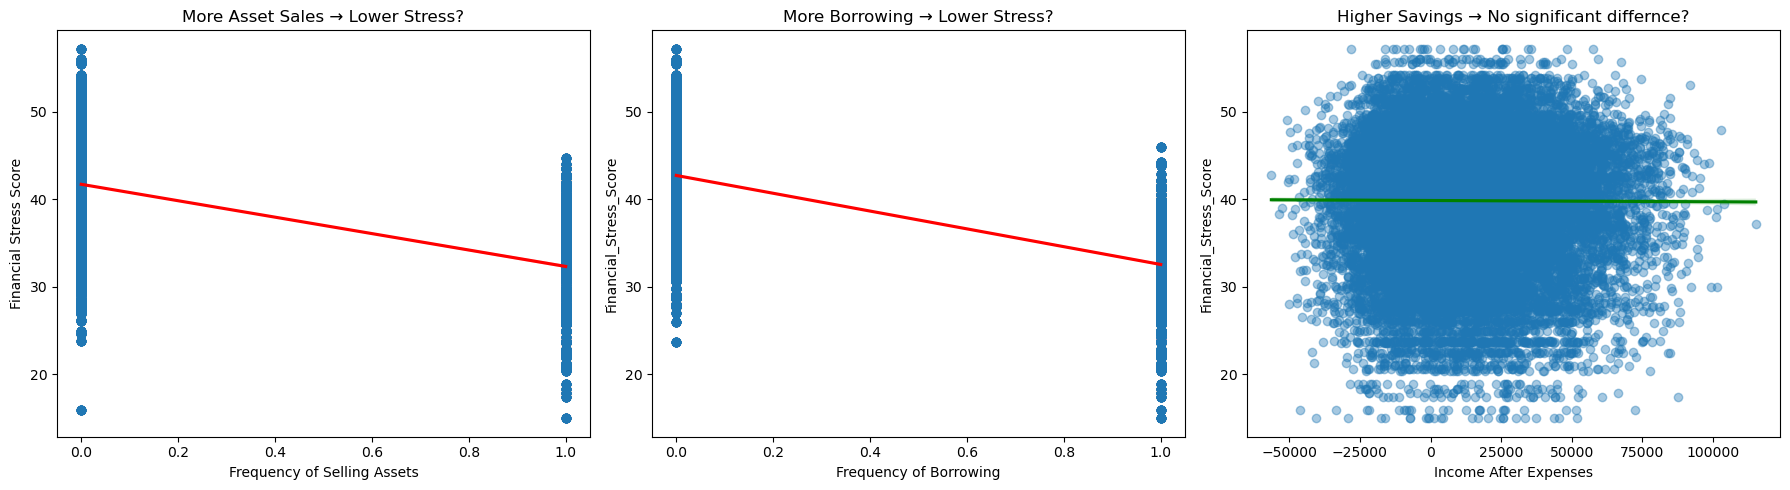

In [70]:
# Set up the figure with 3 subplots
plt.figure(figsize=(18, 5))

# Financial Stress vs Selling Assets
plt.subplot(1, 3, 1)
sns.regplot(x='Selling_Assets', y='Financial_Stress_Score', data=df, 
            scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title("More Asset Sales → Lower Stress?")
plt.xlabel("Frequency of Selling Assets")
plt.ylabel("Financial Stress Score")

# Financial Stress vs Borrowing
plt.subplot(1, 3, 2)
sns.regplot(x='Borrowing', y='Financial_Stress_Score', data=df,
            scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title("More Borrowing → Lower Stress?")
plt.xlabel("Frequency of Borrowing")

# Financial Stress vs Income After Expenses
plt.subplot(1, 3, 3)
sns.regplot(x='Income_After_Expense', y='Financial_Stress_Score', data=df,
            scatter_kws={'alpha':0.4}, line_kws={'color':'green'})
plt.title("Higher Savings → No significant differnce?")
plt.xlabel("Income After Expenses")

plt.tight_layout()
plt.show()

- Borrowing & Selling Assets: Negative correlation with stress (slope downward)

- this implies that Households using these coping mechanisms report lower stress

- Income After Expenses: No clear pattern ( the dots are scattered randomly), 
- this implies that Savings don't directly reduce stress in this dataset, other factors may override savings benefits


## **Prepare data for Modelling**: *Seperate and Split dataset*

In [28]:
# Separate features (X) and target (y) and drop columns we don't need 
X = df.drop(columns=[
    'Household_ID', 'Financial_Stress_Score', 
    'Total_Income', 'Total_Expense', 
    'Month', 'Year_month'
])
y = df['Financial_Stress_Score']  


# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(
    
    X, y, test_size=0.3, random_state=42
)

## **Encoding Categorical Variables**

In [29]:
# Identify categorical/numeric columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Apply preprocessing to train and test sets
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

## **Check for Linearity**

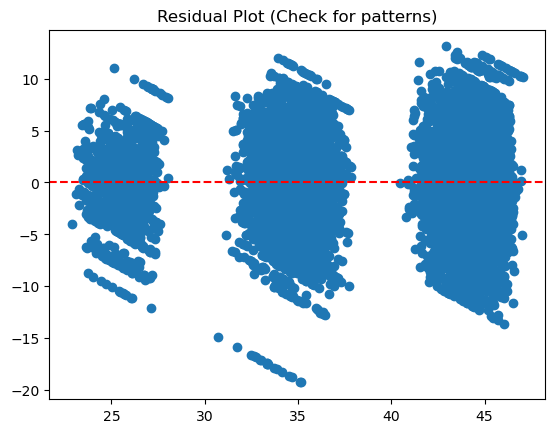

In [30]:
# After preprocessing (X_train_processed is now numeric)
lin_reg_test = LinearRegression().fit(X_train_processed, y_train)

# Residual plot using PROCESSED data
residuals = y_train - lin_reg_test.predict(X_train_processed)
plt.scatter(lin_reg_test.predict(X_train_processed), residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot (Check for patterns)")
plt.show()

# **Model Training**

## *Polynomial Regression*

In [31]:
# Create polynomial features (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_processed)
X_test_poly = poly.transform(X_test_processed)

# Train model
poly_model = LinearRegression().fit(X_train_poly, y_train)
poly_pred = poly_model.predict(X_test_poly)

# Evaluate
poly_r2 = r2_score(y_test, poly_pred)
poly_rmse = np.sqrt(mean_squared_error(y_test, poly_pred))
print(f"Polynomial Regression R²: {poly_r2:.3f}, RMSE: {poly_rmse:.3f}")

Polynomial Regression R²: 0.712, RMSE: 3.845


# *Random Forest*

In [49]:
# Train model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train_processed, y_train)

# Evaluate
rf_pred = rf_model.predict(X_test_processed)
rf_r2 = r2_score(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print(f"Random Forest R²: {rf_r2:.3f}, RMSE: {rf_rmse:.3f}")

Random Forest R²: 0.690, RMSE: 3.985


## *XGBoost*

In [50]:
# Train model
xgb_model = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_processed, y_train)

# Evaluate
xgb_pred = xgb_model.predict(X_test_processed)
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
print(f"XGBoost R²: {xgb_r2:.3f}, RMSE: {xgb_rmse:.3f}")

XGBoost R²: 0.722, RMSE: 3.778


### *Compare the 3models*

Model Performance Comparison:
                Model       R²     RMSE
Polynomial Regression 0.711661 3.845394
        Random Forest 0.690351 3.984961
              XGBoost 0.721708 3.777807


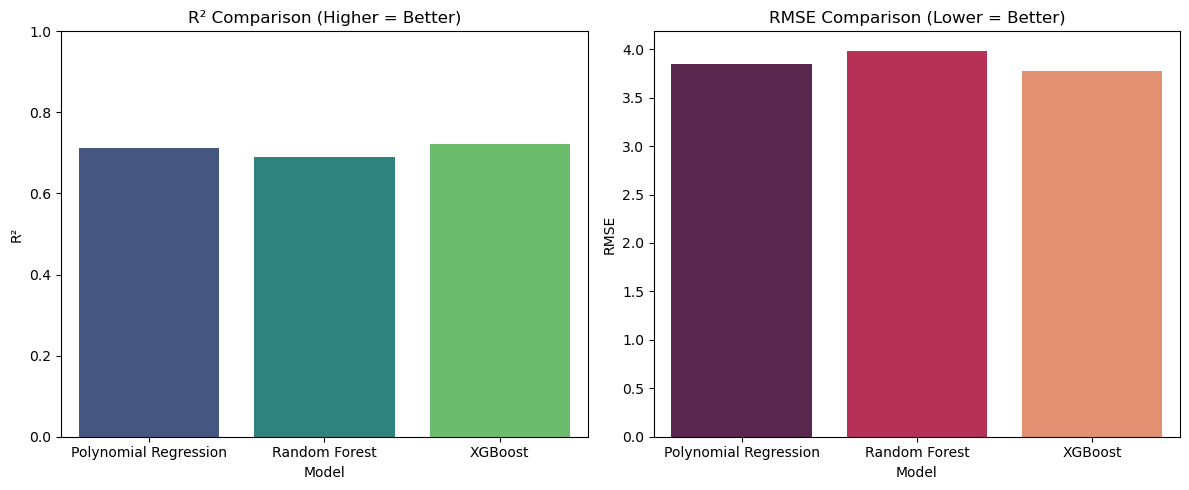

In [55]:
#  Get predictions from all models
poly_pred = poly_model.predict(X_test_poly)
rf_pred = rf_model.predict(X_test_processed)
xgb_pred = xgb_model.predict(X_test_processed)

# Calculate evaluation metrics
results = {
    'Model': ['Polynomial Regression', 'Random Forest', 'XGBoost'],
    'R²': [
        r2_score(y_test, poly_pred),
        r2_score(y_test, rf_pred),
        r2_score(y_test, xgb_pred)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, poly_pred)),
        np.sqrt(mean_squared_error(y_test, rf_pred)),
        np.sqrt(mean_squared_error(y_test, xgb_pred))
    ]
}

# Create comparison DataFrame
results_df = pd.DataFrame(results)
print("Model Performance Comparison:")
print(results_df.to_string(index=False))

# Visual comparison
plt.figure(figsize=(12, 5))

# R² Plot
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='R²', data=results_df, palette='viridis')
plt.title("R² Comparison (Higher = Better)")
plt.ylim(0, 1)

# RMSE Plot
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='RMSE', data=results_df, palette='rocket')
plt.title("RMSE Comparison (Lower = Better)")

plt.tight_layout()
plt.show()

# **Extract Top Features**

## *Random Forest*

Top 5 Random Forest Features:
 Borrowing                   0.591627
Selling_Assets              0.353154
Distance_to_Bank_km         0.018337
Education_Level_Tertiary    0.005238
Food_Expenses               0.004800
dtype: float64


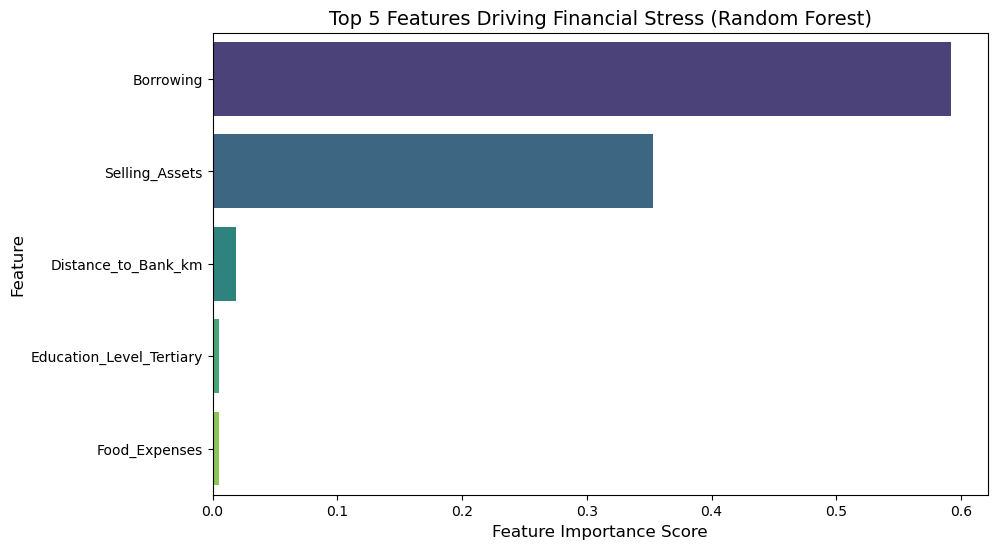

In [56]:
# Get feature names after preprocessing
feature_names = numeric_cols.tolist() + \
                preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist()

# Get importances
rf_importances = pd.Series(rf_model.feature_importances_, index=feature_names)
top_rf_features = rf_importances.sort_values(ascending=False).head(5)
print("Top 5 Random Forest Features:\n", top_rf_features)

top_rf_features = rf_importances.sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_rf_features.values, y=top_rf_features.index, palette="viridis")
plt.title("Top 5 Features Driving Financial Stress (Random Forest)", fontsize=14)
plt.xlabel("Feature Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()

## *XGBoost*

Top 5 XGBoost Features:
 Borrowing                   0.540807
Selling_Assets              0.235701
Food_Expenses               0.019709
Healthcare_Expenses         0.018493
Education_Level_Tertiary    0.016651
dtype: float32


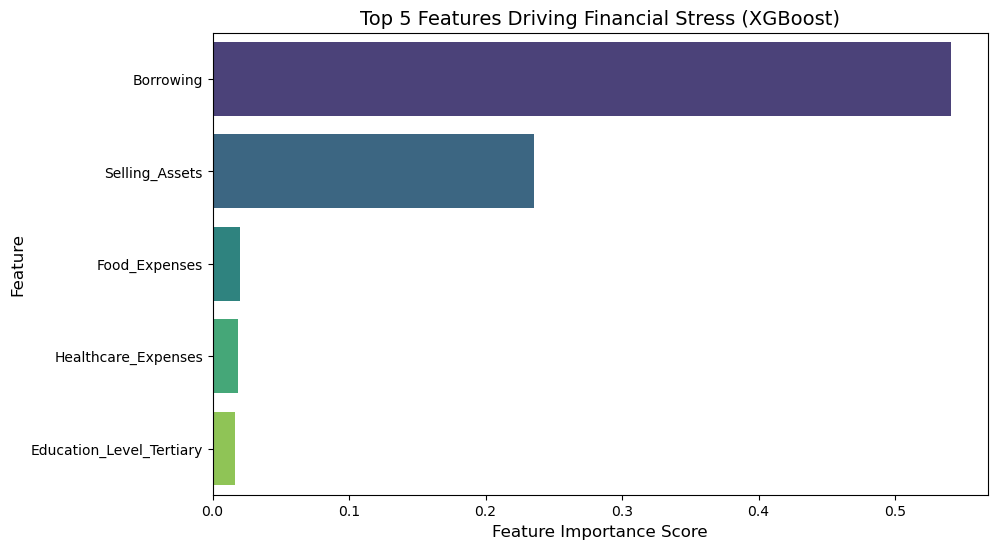

In [57]:
xgb_importances = pd.Series(xgb_model.feature_importances_, index=feature_names)
top_xgb_features = xgb_importances.sort_values(ascending=False).head(5)
print("Top 5 XGBoost Features:\n", top_xgb_features)

top_xgb_features = xgb_importances.sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_xgb_features.values, y=top_xgb_features.index, palette="viridis")
plt.title("Top 5 Features Driving Financial Stress (XGBoost)", fontsize=14)
plt.xlabel("Feature Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()

## **Combine top features**

Combined Top Features: {'Food_Expenses', 'Healthcare_Expenses', 'Education_Level_Tertiary', 'Borrowing', 'Distance_to_Bank_km', 'Selling_Assets'}


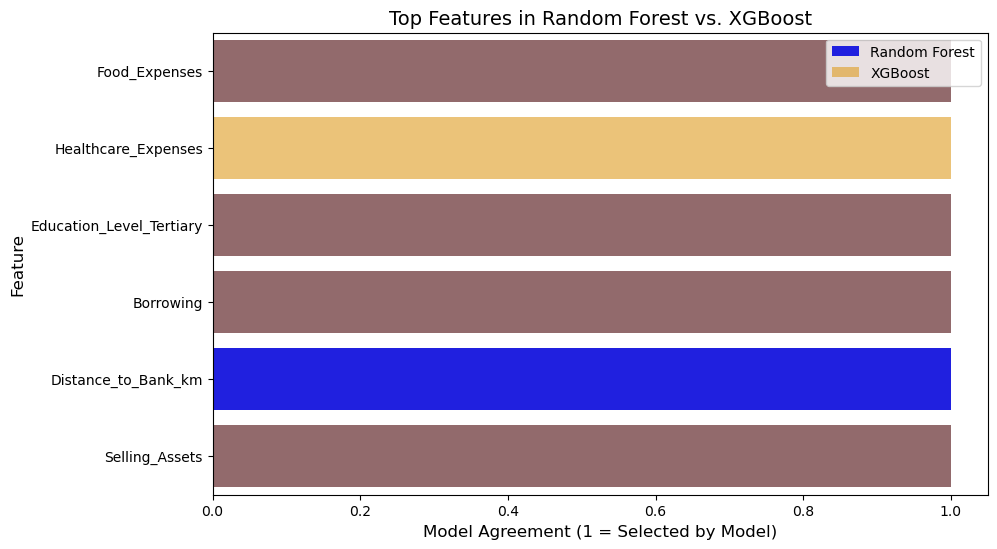

In [58]:
# Get top features from both models (already calculated)
top_rf_features = rf_importances.sort_values(ascending=False).head(5)  # Random Forest
top_xgb_features = xgb_importances.sort_values(ascending=False).head(5)  # XGBoost

# Combine and remove duplicates
combined_features = set(top_rf_features.index.tolist() + top_xgb_features.index.tolist())
print("Combined Top Features:", combined_features)


# Create a DataFrame for visualization
combined_df = pd.DataFrame({
    'Feature': list(combined_features),
    'In_RF': [1 if f in top_rf_features.index else 0 for f in combined_features],
    'In_XGB': [1 if f in top_xgb_features.index else 0 for f in combined_features]
})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='In_RF', 
    y='Feature', 
    data=combined_df, 
    color='blue', 
    label='Random Forest'
)
sns.barplot(
    x='In_XGB', 
    y='Feature', 
    data=combined_df, 
    color='orange', 
    label='XGBoost',
    alpha=0.6
)
plt.title("Top Features in Random Forest vs. XGBoost", fontsize=14)
plt.xlabel("Model Agreement (1 = Selected by Model)", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.legend()
plt.show()

## **Save the best model**

In [59]:
import joblib

# Save XGBoost (assuming it performed best)
joblib.dump(xgb_model, 'best_model_xgboost.pkl')

# Optional: Save the preprocessor to reuse later
joblib.dump(preprocessor, 'preprocessor.pkl')
print("Model saved!")

Model saved!


## **Tune XGBoost**

In [60]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200]
}

# Search for best parameters
xgb = XGBRegressor(random_state=42)
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_processed, y_train)

print(f"Best R²: {grid_search.best_score_:.3f}")
print(f"Best Params: {grid_search.best_params_}")

Best R²: 0.977
Best Params: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}


## **Train tuned XGBOOst on Top Features**

In [61]:
# Retrain the TUNED XGBoost (best params) on TOP FEATURES only
xgb_tuned_top = XGBRegressor(
    learning_rate=0.2,
    max_depth=7,
    n_estimators=200,
    random_state=42
)

# Subset data to top features
top_features = ['Food_Expenses', 'Selling_Assets', 'Education_Level_Tertiary', 
                'Healthcare_Expenses', 'Distance_to_Bank_km', 'Borrowing']
X_train_top = X_train_processed[:, [feature_names.index(f) for f in top_features]]
X_test_top = X_test_processed[:, [feature_names.index(f) for f in top_features]]

# Train and evaluate
xgb_tuned_top.fit(X_train_top, y_train)
y_pred_top = xgb_tuned_top.predict(X_test_top)
print(f"Tuned XGBoost (Top Features) R²: {r2_score(y_test, y_pred_top):.3f}")

Tuned XGBoost (Top Features) R²: 0.831


In [62]:
print(f"Initial XGBoost (All Features) R²: 0.722 (Needs Improvement)")  
print(f"Tuned XGBoost (All Features) R²: 0.977 (Overfit)")  
print(f"Tuned XGBoost (Top Features) R²: 0.831 (Generalizable)")  

Initial XGBoost (All Features) R²: 0.722 (Needs Improvement)
Tuned XGBoost (All Features) R²: 0.977 (Overfit)
Tuned XGBoost (Top Features) R²: 0.831 (Generalizable)


## **Retrain Preprocessor on only the top features**

In [63]:

# 1. Load your dataset (replace with your actual data)
df = df

# 2. Define the FINAL 6 features (after manual encoding)
final_features = [
    'Food_Expenses',
    'Selling_Assets',
    'Healthcare_Expenses', 
    'Distance_to_Bank_km',
    'Borrowing',
    'Education_Level_Tertiary'  # Binary (1=Tertiary, 0=Other)
]

# 3. Manually encode "Tertiary" if not already done
df['Education_Level_Tertiary'] = (df['Education_Level'] == 'Tertiary').astype(int)

# 4. Create and fit the preprocessor (ONLY scales the 6 features)
preprocessor_final = ColumnTransformer([
    ('scale', StandardScaler(), final_features)
], remainder='drop')  # Ignore all other columns

preprocessor_final.fit(df[final_features])  # Fit on your full dataset




ColumnTransformer(transformers=[('scale', StandardScaler(),
                                 ['Food_Expenses', 'Selling_Assets',
                                  'Healthcare_Expenses', 'Distance_to_Bank_km',
                                  'Borrowing', 'Education_Level_Tertiary'])])

## *save the tuned model, preprocessor and top features name*

In [66]:
# 5. Save the preprocessor
joblib.dump(preprocessor_final, 'preprocessor_final.pkl')


# 6. Save the new and model

joblib.dump(xgb_tuned_top, 'xgboost_top_features.pkl')

# Save the list of top features (to know which ones were used)
import json
with open('top_features.json', 'w') as f:
    json.dump(top_features, f)


print("Model, preprocessor and top features saved! Features: \n", final_features)


Model, preprocessor and top features saved! Features: 
 ['Food_Expenses', 'Selling_Assets', 'Healthcare_Expenses', 'Distance_to_Bank_km', 'Borrowing', 'Education_Level_Tertiary']


# **Testing Predictions with unseen data**

In [71]:
# Load your model and preprocessor
model = joblib.load('xgboost_top_features.pkl')  # Your pretrained model
preprocessor = joblib.load('preprocessor_final.pkl')

# Example prediction
new_data = pd.DataFrame({
    'Food_Expenses': [67853],
    'Selling_Assets': [0],
    'Healthcare_Expenses': [13570],
    'Distance_to_Bank_km': [19.33],
    'Borrowing': [0],
    'Education_Level_Tertiary': [0]  # 1 if 'Tertiary', else 0
})



# Preprocess and predict
new_data_processed = preprocessor.transform(new_data)
prediction = model.predict(new_data_processed)
print(f"Predicted Stress Score: {prediction[0]:.2f}")

Predicted Stress Score: 41.61


In [68]:
new_x_test = X_test[['Food_Expenses','Selling_Assets','Healthcare_Expenses','Distance_to_Bank_km','Borrowing','Education_Level']]
new_x_test

,Food_Expenses,Selling_Assets,Healthcare_Expenses,Distance_to_Bank_km,Borrowing,Education_Level
3111,67853,0,13570,19.33,0,Secondary
18679,58381,0,11676,6.94,0,No Education
17472,39784,1,7956,32.00,0,Secondary
21451,36485,0,7297,3.48,0,Primary
20800,50201,1,10040,49.06,1,Secondary
...,...,...,...,...,...,...
18801,67587,0,13517,15.26,1,Tertiary
542,34276,0,6855,9.94,0,No Education
22332,56834,0,11366,42.91,0,No Education
7958,51378,0,10275,2.90,1,Secondary


In [69]:
y_test

3111     41.91
18679    41.92
17472    33.47
21451    46.24
20800    22.83
         ...  
18801    34.09
542      45.31
22332    43.21
7958     41.20
5176     47.61
Name: Financial_Stress_Score, Length: 7200, dtype: float64